In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append(os.path.abspath(filepath))

from notebooks.preprocess_util import *
from cces_util import *

/Users/cyz/survey/active_survey


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
response_filename = "data/cces/cces12.csv"
responses = pd.read_csv(response_filename, index_col=0)

In [4]:
responses.shape

(54535, 30)

In [5]:
# drop rows with no respones
responses = responses.dropna(how='all', axis=0)
responses.shape

(54535, 30)

In [6]:
# Drop questions with no responses
responses = responses.dropna(how='all', axis=1)
responses.shape

(54535, 30)

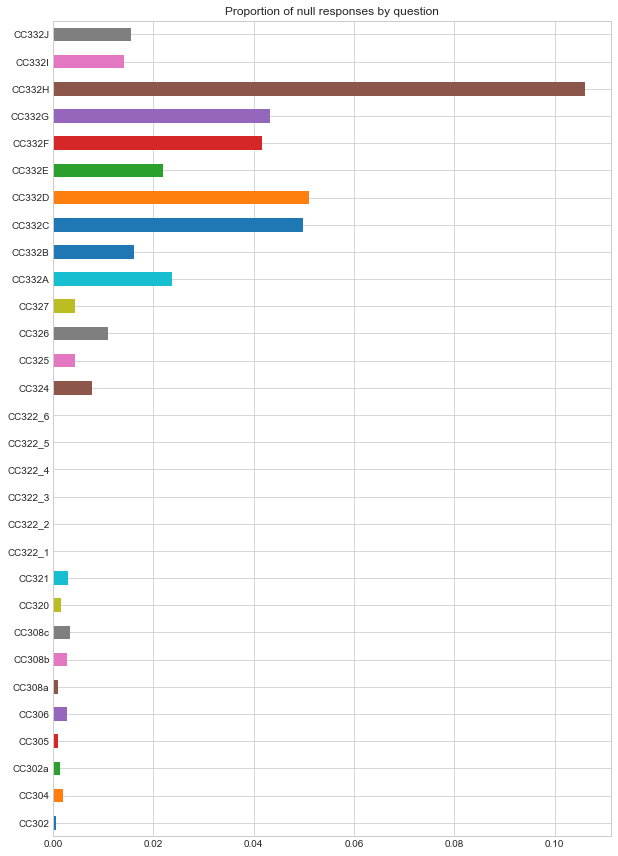

In [7]:
plot_na_proportion(responses)

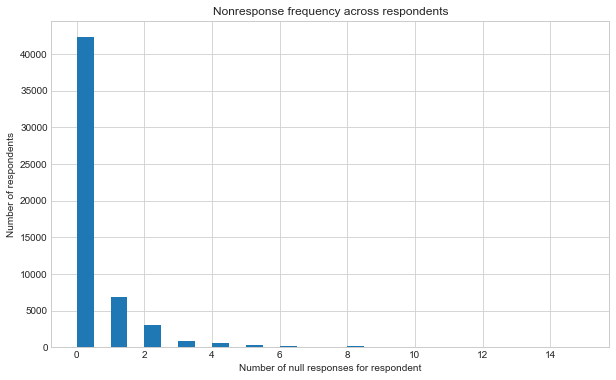

In [8]:
plot_nonresponse_freq(responses)

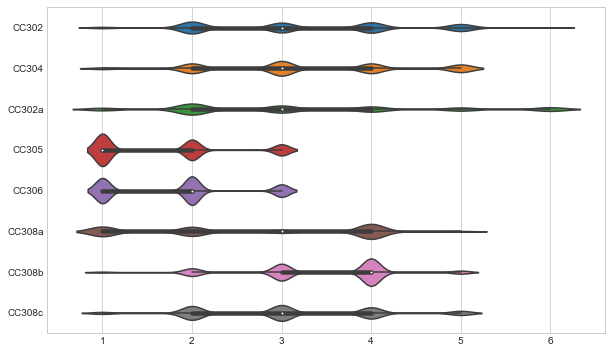

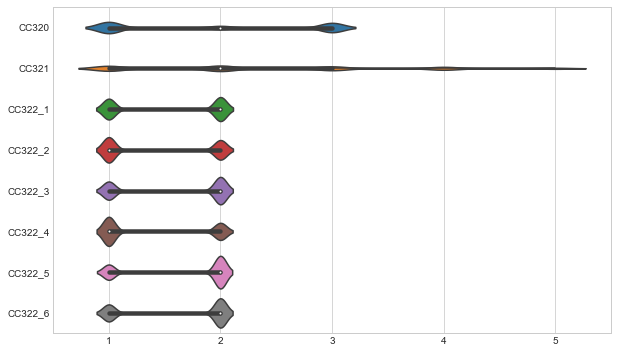

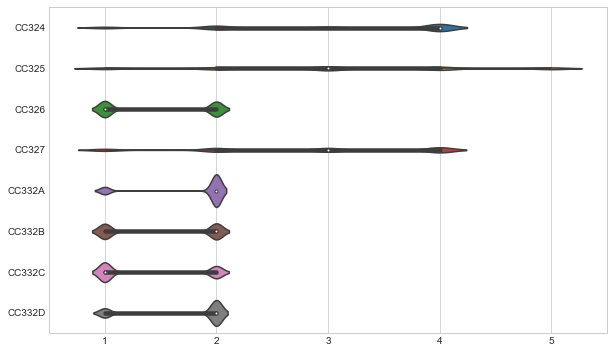

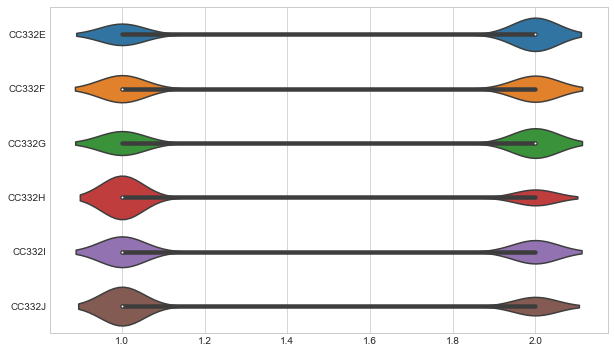

In [9]:
response_violin_plots(responses)

In [10]:
# Remove "Not sure", "Other" responses that break order; replace by NA
replace_values(responses, dict(
    CC302=[6],
    CC302a=[6],
    CC305=[3],
    CC306=[3],
    CC308a=[5],
    CC308b=[5],
    CC308c=[5]
))

# 320 should flip 2 and 3. Just drop it
responses.drop('CC320', axis=1, inplace=True)

Replacing 666/54535 (1.22%) values of CC302 with NA
Replacing 6102/54535 (11.19%) values of CC302a with NA
Replacing 9479/54535 (17.38%) values of CC305 with NA
Replacing 10306/54535 (18.90%) values of CC306 with NA
Replacing 1159/54535 (2.13%) values of CC308a with NA
Replacing 2974/54535 (5.45%) values of CC308b with NA
Replacing 4748/54535 (8.71%) values of CC308c with NA


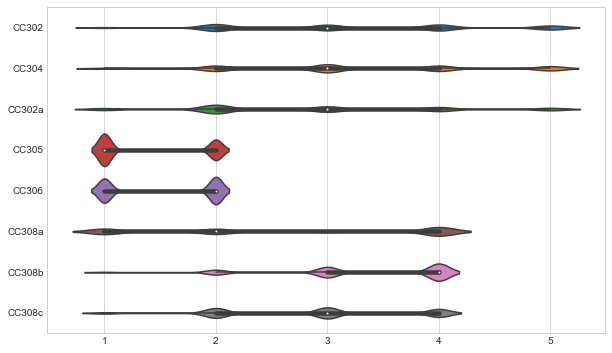

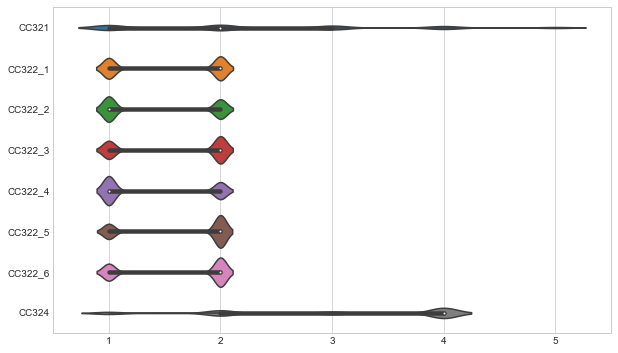

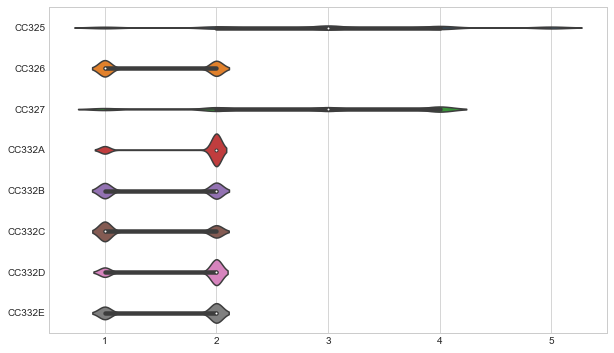

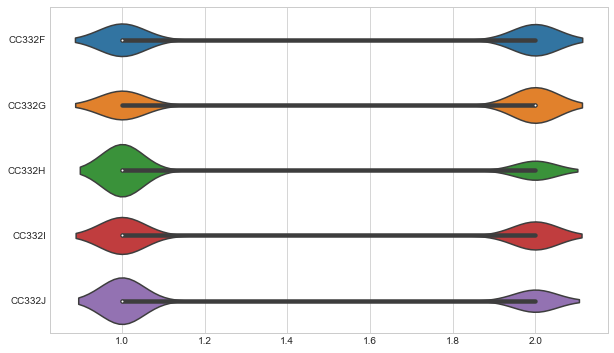

In [11]:
response_violin_plots(responses)

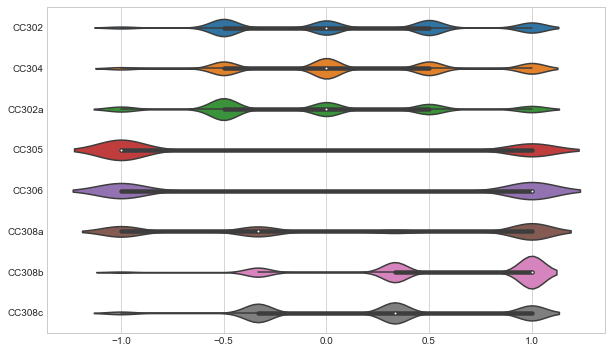

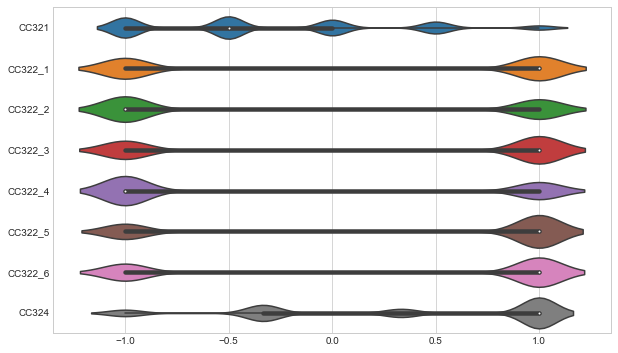

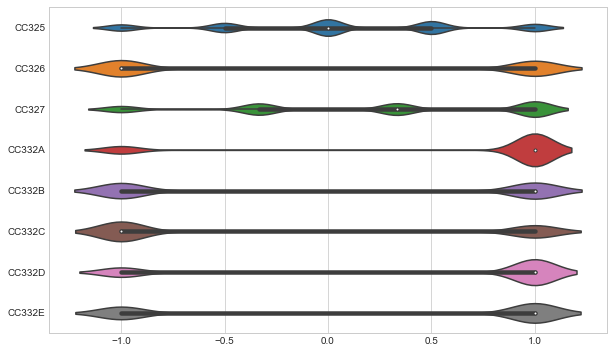

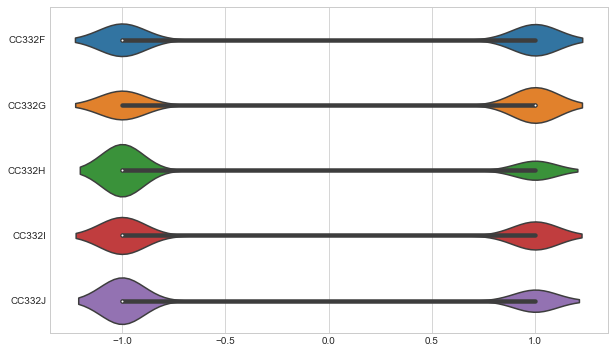

In [12]:
# center and scale responses two ways
responses_scaled = center_and_scale(responses, method='minmax')
response_violin_plots(responses_scaled)
responses_scaled.to_csv("data/cces/cces12_cs.csv", float_format='%.3f')

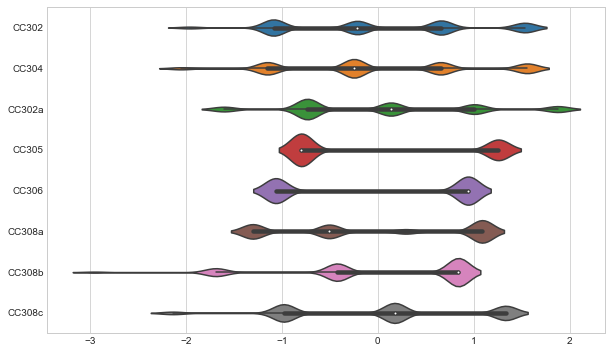

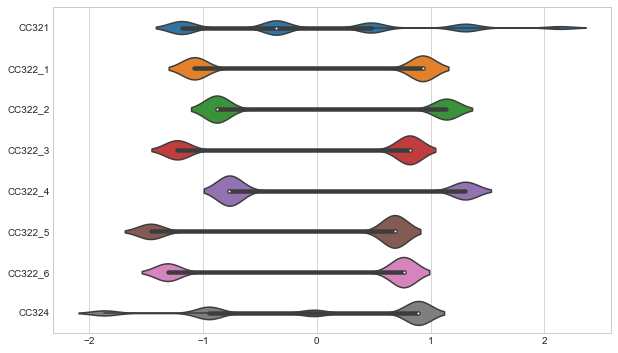

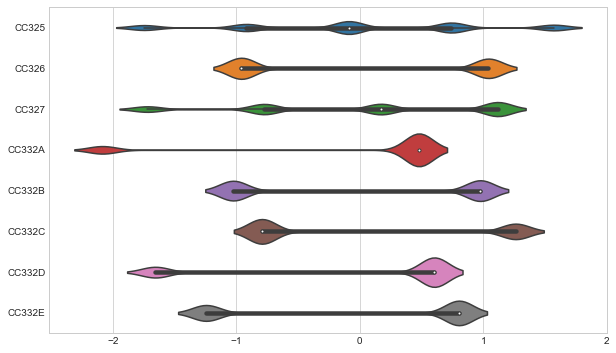

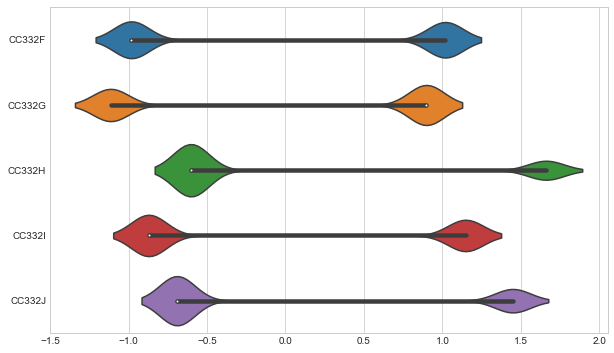

In [13]:
responses_scaled = center_and_scale(responses, method='standard')
response_violin_plots(responses_scaled)
responses_scaled.to_csv("data/cces/cces12_std.csv", float_format='%.3f')

In [14]:
# Save question names
questions = responses.columns.tolist()
metadata_filename = filepath + "/data/cces/CCES12_Common_VV-ddi.xml"
question_to_label = parse_question_metadata(metadata_filename)
question_df = pd.DataFrame([dict(question=q, text=question_to_label[q]) for q in questions])
question_df.to_csv("data/cces/cces12_questions.csv")